# ARTI406 - Assignment 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [4]:
# Load Dataset
df = pd.read_csv("comprehensive_foods_usda.csv")
df.head()

,fdc_id,food_name,data_type,food_category,brand_owner,brand_name,ingredients,serving_size,serving_unit,household_serving,...,protein_g,saturated_fat_g,vitamin_c_mg,fiber_g,iron_mg,sodium_mg,sugar_g,cholesterol_mg,health_score,food_type
0,167782,"Abiyuch, raw",SR Legacy,Fruits and Fruit Juices,NaN,NaN,NaN,NaN,NaN,NaN,...,1.50,0.014,54.1,5.3,1.61,20.0,8.55,NaN,65,Fruits
1,171687,"Acerola juice, raw",SR Legacy,Fruits and Fruit Juices,NaN,NaN,NaN,NaN,NaN,NaN,...,0.40,0.068,1600.0,0.3,0.50,3.0,4.50,0.0,55,Fruits
2,171686,"Acerola, (west indian cherry), raw",SR Legacy,Fruits and Fruit Juices,NaN,NaN,NaN,NaN,NaN,NaN,...,0.40,0.068,1680.0,1.1,0.20,7.0,NaN,0.0,55,Fruits
3,168061,Acorn stew (Apache),SR Legacy,American Indian/Alaska Native Foods,NaN,NaN,NaN,NaN,NaN,NaN,...,6.81,1.280,0.0,0.7,1.00,130.0,0.34,20.0,50,Other
4,168992,"Agave, cooked (Southwest)",SR Legacy,American Indian/Alaska Native Foods,NaN,NaN,NaN,NaN,NaN,NaN,...,0.99,NaN,0.3,10.6,3.55,13.0,20.90,0.0,50,Other


### Check Missing Values

In [6]:
print(df.isna())

       fdc_id  food_name  data_type  food_category  brand_owner  brand_name  \
0       False      False      False          False         True        True   
1       False      False      False          False         True        True   
2       False      False      False          False         True        True   
3       False      False      False          False         True        True   
4       False      False      False          False         True        True   
...       ...        ...        ...            ...          ...         ...   
39995   False      False      False          False        False       False   
39996   False      False      False          False        False       False   
39997   False      False      False          False        False       False   
39998   False      False      False          False        False       False   
39999   False      False      False          False        False       False   

       ingredients  serving_size  serving_unit  hou

In [8]:
print(df.isna().sum())

fdc_id                   0
food_name                0
data_type                0
food_category           46
brand_owner           8617
brand_name            9746
ingredients           8344
serving_size          8158
serving_unit          8158
household_serving     9210
calories               462
carbs_g                589
calcium_mg            5785
fat_g                  287
protein_g              253
saturated_fat_g       4986
vitamin_c_mg         17060
fiber_g               6275
iron_mg               5750
sodium_mg              617
sugar_g               4261
cholesterol_mg        5842
health_score             0
food_type                0
dtype: int64


### Check Duplicate Rows

In [10]:
df.duplicated()[df.duplicated() == True]

Series([], dtype: bool)

### Number of Rows and Columns

In [12]:
print("Shape (rows, columns): ", df.shape, "\n")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Shape (rows, columns):  (40000, 24) 

Number of rows: 40000
Number of columns: 24


### Data Types of Columns

In [14]:
df.dtypes

fdc_id                 int64
food_name             object
data_type             object
food_category         object
brand_owner           object
brand_name            object
ingredients           object
serving_size         float64
serving_unit          object
household_serving     object
calories             float64
carbs_g              float64
calcium_mg           float64
fat_g                float64
protein_g            float64
saturated_fat_g      float64
vitamin_c_mg         float64
fiber_g              float64
iron_mg              float64
sodium_mg            float64
sugar_g              float64
cholesterol_mg       float64
health_score           int64
food_type             object
dtype: object

In [16]:
# Convert numeric columns to proper numeric dtype
numeric_cols = [
    'serving_size', 'calories', 'carbs_g', 'calcium_mg', 'fat_g', 'protein_g',
    'saturated_fat_g', 'vitamin_c_mg', 'fiber_g', 'iron_mg', 'sodium_mg',
    'sugar_g', 'cholesterol_mg', 'health_score'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dtypes

fdc_id                 int64
food_name             object
data_type             object
food_category         object
brand_owner           object
brand_name            object
ingredients           object
serving_size         float64
serving_unit          object
household_serving     object
calories             float64
carbs_g              float64
calcium_mg           float64
fat_g                float64
protein_g            float64
saturated_fat_g      float64
vitamin_c_mg         float64
fiber_g              float64
iron_mg              float64
sodium_mg            float64
sugar_g              float64
cholesterol_mg       float64
health_score           int64
food_type             object
dtype: object

In [ ]:
df.describe(include='all')

### Univariate Analysis

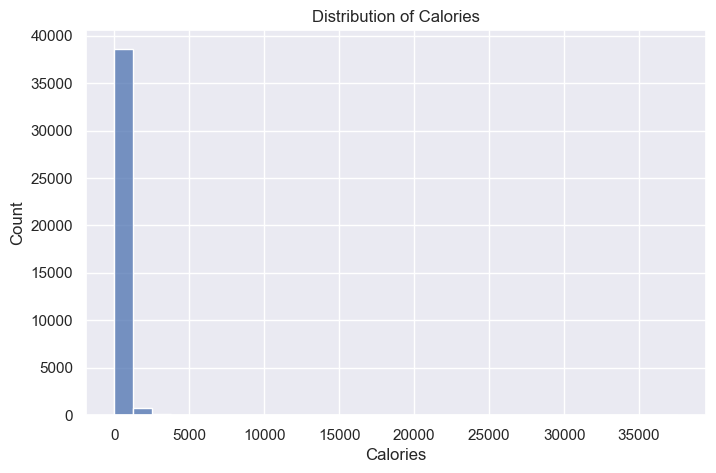

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['calories'].dropna(), bins=30)
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.show()


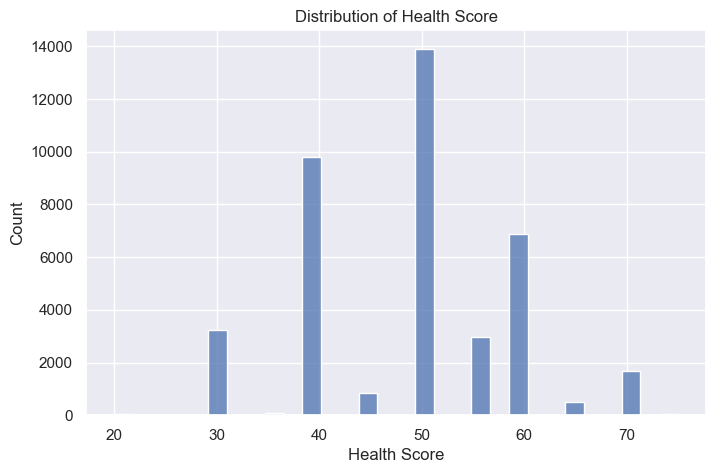

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['health_score'].dropna(), bins=30)
plt.title("Distribution of Health Score")
plt.xlabel("Health Score")
plt.show()


## Bivariate Analysis

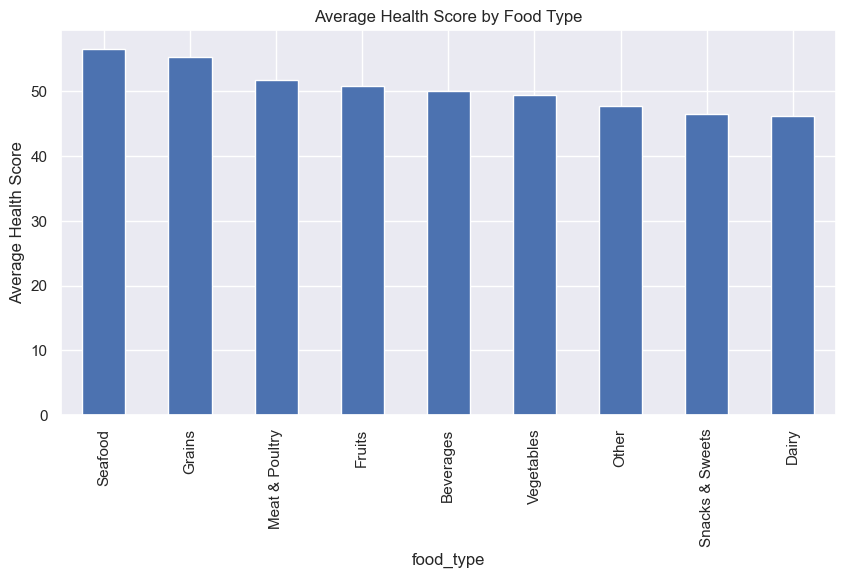

food_type
Seafood            56.591865
Grains             55.360697
Meat & Poultry     51.797673
Fruits             50.832238
Beverages          50.089888
Vegetables         49.470787
Other              47.801366
Snacks & Sweets    46.418226
Dairy              46.161690
Name: health_score, dtype: float64

In [27]:
foodtype_health = df.groupby('food_type')['health_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
foodtype_health.plot(kind='bar')
plt.title("Average Health Score by Food Type")
plt.ylabel("Average Health Score")
plt.show()
foodtype_health

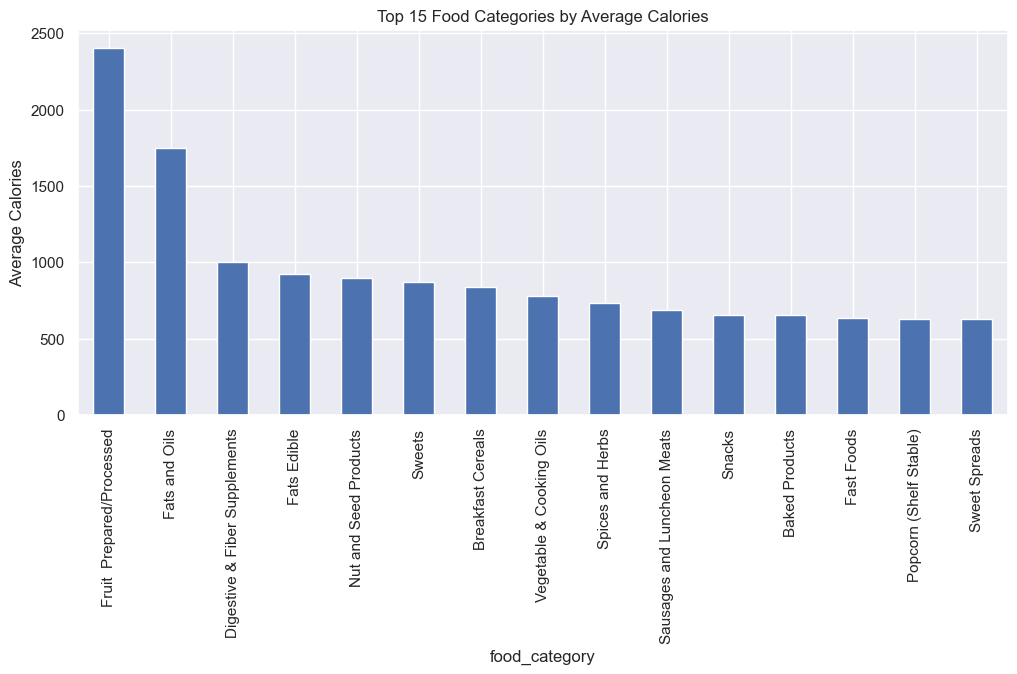

food_category
Fruit  Prepared/Processed        2401.800000
Fats and Oils                    1747.788018
Digestive & Fiber Supplements    1000.000000
Fats Edible                       923.000000
Nut and Seed Products             898.346154
Sweets                            866.980501
Breakfast Cereals                 836.856410
Vegetable & Cooking Oils          780.833333
Spices and Herbs                  734.484375
Sausages and Luncheon Meats       684.502890
Snacks                            656.147453
Baked Products                    653.757692
Fast Foods                        636.487179
Popcorn (Shelf Stable)            627.000000
Sweet Spreads                     625.000000
Name: calories, dtype: float64

In [25]:
category_calories = df.groupby('food_category')['calories'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,5))
category_calories.plot(kind='bar')
plt.title("Top 15 Food Categories by Average Calories")
plt.ylabel("Average Calories")
plt.show()

category_calories

In [31]:
brand_counts = (df[df['brand_owner'].notna() & (df['brand_owner'].str.strip() != '')].groupby('brand_owner')['fdc_id']
    .count().sort_values(ascending=False))
brand_counts.head(10)

brand_owner
Beaver Street Fisheries Inc.    706
Wal-Mart Stores, Inc.           562
Target Stores                   527
Ahold USA, Inc.                 496
GENERAL MILLS SALES INC.        481
The Kroger Co.                  411
Safeway, Inc.                   378
Wegmans Food Markets, Inc.      367
Whole Foods Market, Inc.        334
Meijer, Inc.                    299
Name: fdc_id, dtype: int64

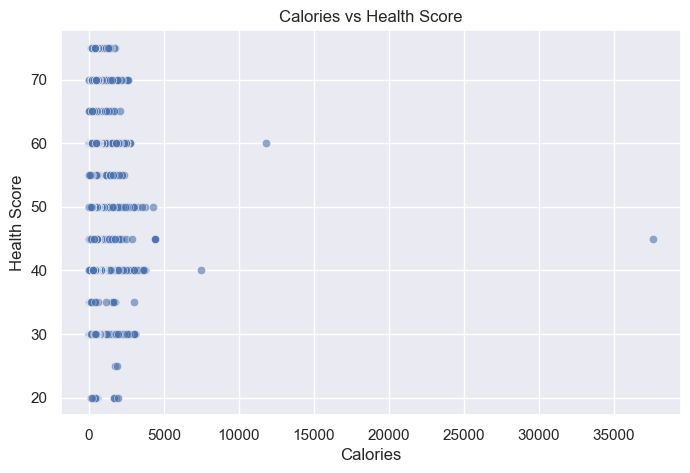

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='calories', y='health_score', data=df, alpha=0.6)
plt.title("Calories vs Health Score")
plt.xlabel("Calories")
plt.ylabel("Health Score")
plt.show()

### Correlation Matrix

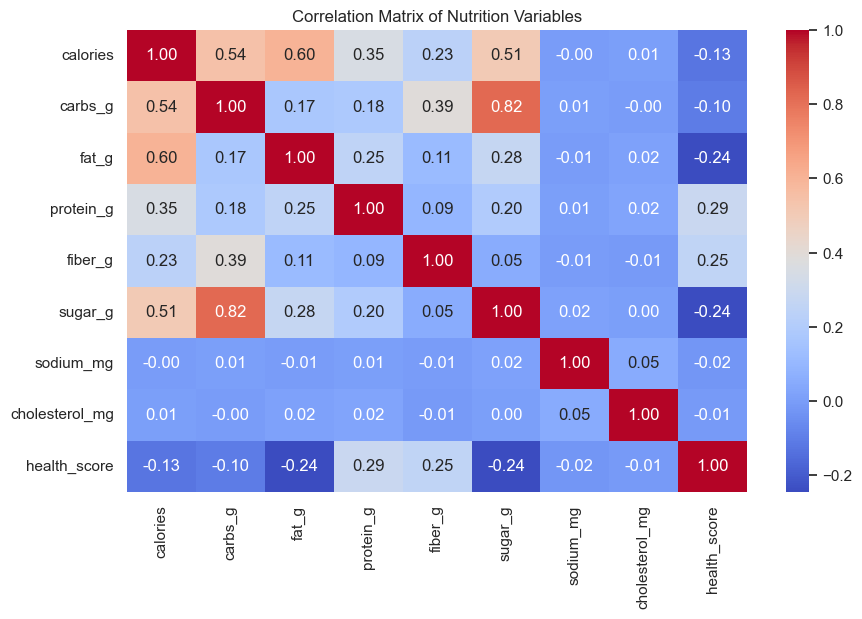

In [35]:
corr_cols = [
    'calories', 'carbs_g', 'fat_g', 'protein_g', 'fiber_g',
    'sugar_g', 'sodium_mg', 'cholesterol_mg', 'health_score'
]

plt.figure(figsize=(10,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix of Nutrition Variables")
plt.show()

## Final Analysis (Trend-Style)

<Figure size 1200x600 with 0 Axes>

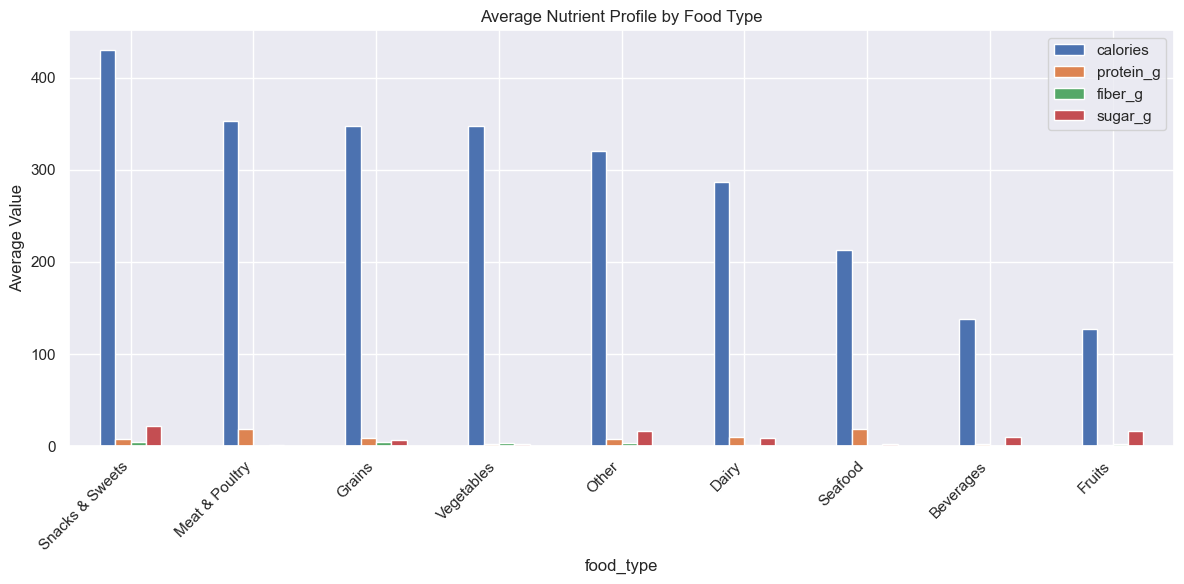

,calories,protein_g,fiber_g,sugar_g
food_type,,,,
Snacks & Sweets,429.971949,7.843320,4.518182,21.734695
Meat & Poultry,352.807322,18.868014,0.440398,1.715873
Grains,348.005533,8.726955,4.294132,6.541411
Vegetables,347.169138,2.576198,3.173950,2.462776
Other,320.490003,7.707291,3.073783,16.684132
Dairy,287.231318,10.235168,0.990175,8.436717
Seafood,213.240986,18.438082,0.159202,2.589648
Beverages,137.775621,1.818727,0.616841,10.123567
Fruits,126.888453,1.165474,2.056853,16.628731


In [37]:
nutrient_trend = df.groupby('food_type')[['calories', 'protein_g', 'fiber_g', 'sugar_g']].mean().sort_values('calories', ascending=False)

plt.figure(figsize=(12,6))
nutrient_trend[['calories', 'protein_g', 'fiber_g', 'sugar_g']].plot(kind='bar', figsize=(12,6))
plt.title("Average Nutrient Profile by Food Type")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

nutrient_trend